In [2]:
import tensorflow as tf
print('Tensorflow version', tf.__version__)

Tensorflow version 2.11.0


In [3]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Create Synthetic data

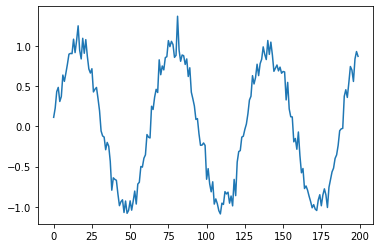

In [27]:
#Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

#plot it
plt.plot(series)
plt.show()

Build Dataset

In [28]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) #Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


Autoregressive RNN model

In [32]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(0.1),
)

##train the model

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 119ms/step - loss: 1.7689 - val_loss: 0.1615
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.2381 - val_loss: 0.1200
Epoch 3/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0770 - val_loss: 0.1363
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0831 - val_loss: 0.0761
Epoch 5/80
3/3 [==============================] - 0s 32ms/step - loss: 0.0942 - val_loss: 0.0554
Epoch 6/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0710 - val_loss: 0.0306
Epoch 7/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0368 - val_loss: 0.0628
Epoch 8/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0591 - val_loss: 0.0342
Epoch 9/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0363 - val_loss: 0.0435
Epoch 10/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0446 - val_loss: 0.0327
Epoch 11/80
3/3 [===========

Plot a loss

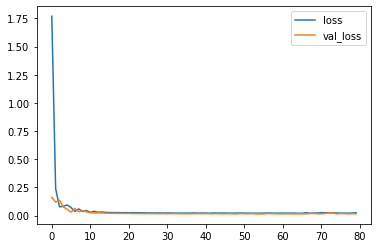

In [33]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [23]:
#Wrong way of forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

#index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0,0] #1x1 array -> scalar
  i += 1
  
  #Update the prediction list
  validation_predictions.append(p)

1/1 [==============================] - 0s 22ms/step


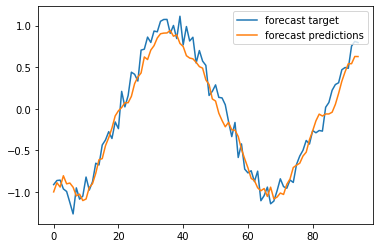

In [24]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

In [35]:
##Correct forecast values ( use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2] #1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 36ms/step


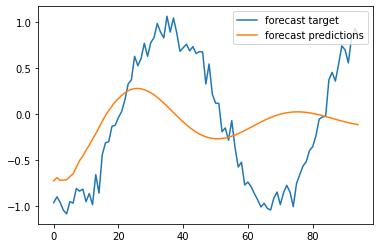

In [36]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()